In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("C:\\Users\\arups\\OneDrive\\Desktop\\COLLECTION\\PROGRAMS\\TEST_CSVs\\placement.csv")

df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df = df.iloc[: , 1:]
df.head()

# SUPPOSE I WANT TO SELECT SPECIFIC COL HOW I DO THAT USING ILOC ?
# df = df.iloc[: , [1 , 3]] eg. 'cgpa' , 'placement' ; columns will be selected.
# similarly df = df.iloc[[1 , 3] , [1 , 3]] this is for rows

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


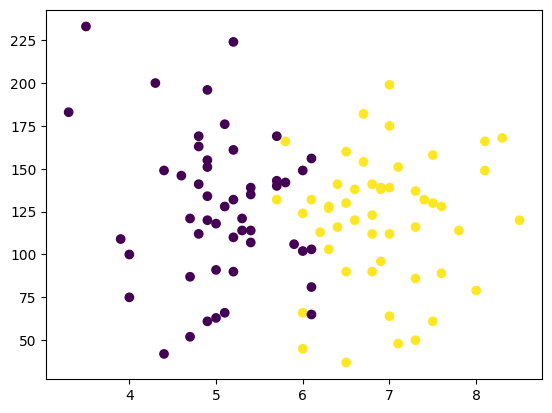

In [5]:
plt.scatter(df['cgpa'] , df['iq'] , c = df['placement'] )
plt.show()

In [5]:
# Steps :: 

# 0.1 : Process + EDA + Feature Selection
# 0.2 : Extract input and output cols
# 0.3 : Scale the values 
# 0.4 : Train test model
# 0.5 : Evaluate the model/model selection
# 0.6 : Deploy the model

In [6]:
X = df.iloc[: , : 2] # independent variable
y = df.iloc[: , -1]  # dependent variable

In [7]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.1)
#  10% of the data will be allocated for testing, and the remaining 90% will be used for training.


# Here are a few reasons why scaling is necessary:

Avoiding bias: Many machine learning algorithms use distance-based calculations to make predictions or find patterns in the data. Features with larger scales or ranges can dominate the learning process and introduce bias. Scaling the features ensures that each feature contributes proportionately to the learning process.

Gradient-based optimization: Optimization algorithms, such as gradient descent, are commonly used in training machine learning models. Scaling the features can help these algorithms converge faster, as the optimization process can be more efficient when the features have similar scales.

Regularization: Regularization techniques, such as L1 and L2 regularization, penalize large coefficients in the model. Scaling the features can prevent some features with larger scales from dominating the regularization process.

Improving algorithm performance: Some machine learning algorithms, such as Support Vector Machines (SVM) and K-means clustering, are sensitive to the scales of the features. Scaling the features can improve the performance of these algorithms and help them converge faster or find better solutions.

Dealing with different units: When features have different units of measurement, it becomes challenging to compare and combine them. Scaling the features to a similar range removes the unit differences and allows for easier comparison and integration.

There are different scaling techniques available, such as Standardization (mean=0, variance=1), Min-Max Scaling (0-1 range), and Robust Scaling (scales based on median and quartiles), among others. The choice of scaling technique depends on the nature of the data and the requirements of the machine learning algorithm being used.

In [8]:
#Scaling


from sklearn.preprocessing import StandardScaler


In [9]:
scaler = StandardScaler()

In [10]:
X_train = scaler.fit_transform(X_train)
X_train  # between -1 <= X_train <= 1

array([[ 1.39766061,  0.11830372],
       [ 0.08278826, -1.4637295 ],
       [-0.70613515,  2.52902101],
       [-0.96910962, -0.08258939],
       [ 1.74829323, -1.11216656],
       [ 0.25810457, -0.50948724],
       [ 0.43342088, -0.83593854],
       [-1.14442593, -0.05747775],
       [ 0.87171167,  0.39453174],
       [-0.53081884,  0.39453174],
       [ 1.13468614, -0.93638509],
       [-0.88145146, -0.8108269 ],
       [-0.88145146, -0.13281267],
       [-1.49505856,  1.92634169],
       [-1.75803303, -1.21261312],
       [ 1.31000245,  0.87165287],
       [-0.79379331,  0.11830372],
       [ 0.87171167,  1.29855072],
       [-0.96910962, -1.56417606],
       [-0.70613515, -0.33370577],
       [-0.0048699 , -1.43861786],
       [-2.19632381,  2.75502575],
       [-0.61847699, -0.23325922],
       [-1.05676778, -0.2834825 ],
       [ 0.78405351,  0.39453174],
       [-0.96910962,  1.82589513],
       [ 1.57297692, -0.23325922],
       [ 0.69639535, -0.00725447],
       [-0.26784437,

In [11]:
X_test = scaler.fit_transform(X_test)
X_test

array([[-0.59841949,  0.14896496],
       [ 1.57765138, -0.95543043],
       [-0.05440177,  1.02220782],
       [-0.96109797,  1.09925867],
       [-0.14507139,  0.35443387],
       [ 2.03099948,  1.02220782],
       [ 0.48961595, -0.26197286],
       [-0.87042835,  0.73968807],
       [-0.77975873, -1.62320438],
       [-0.68908911, -1.54615354]])

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
clf = LogisticRegression()

# MOdel Training
clf.fit(X_train , y_train)

LogisticRegression()

In [15]:
# PREDICTION

y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [16]:
y_test

86    0
33    0
0     1
51    0
50    0
97    1
30    1
82    1
92    0
79    1
Name: placement, dtype: int64

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test , y_pred)

0.9

In [19]:
from mlxtend.plotting import plot_decision_regions

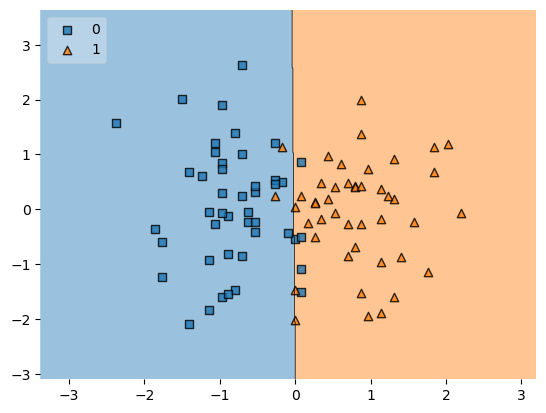

In [20]:
plot_decision_regions(X_train , y_train.values , clf = clf , legend = 2)
plt.show()

# The clf argument in the plot_decision_regions function is used to specify the
# trained classifier model that you want to visualize. In this case, clf refers 
# to the classifier model that has been trained using the X_train data and y_train labels.

In [21]:
import pickle # This is for Making Model

In [22]:
pickle.dump(clf , open('model.pk1' , 'wb')) # Object ko dump karta hai , using Write Binary 'wb'